In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import joblib
import sys
from datetime import datetime


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor


# remove warnings
import warnings

# Suppress specific warnings
warnings.filterwarnings('ignore', category=RuntimeWarning, module='pandas.io.formats.format')

# 1. Loading Dataset

In [2]:
# Loading the data
new_data = pd.read_csv("/kaggle/input/seperated-data/Bangladesh_Dhaka.csv")

# print the shape
print(new_data.shape)

#runs the first 5 rows
new_data.head()

(2104, 12)


,Date,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
0,2016-03-08,NaN,NaN,NaN,NaN,182.0,NaN,NaN,NaN,NaN,NaN,Bangladesh_Dhaka
1,2016-03-09,NaN,NaN,NaN,NaN,168.0,NaN,NaN,NaN,NaN,NaN,Bangladesh_Dhaka
2,2016-03-10,NaN,NaN,NaN,NaN,171.0,NaN,NaN,NaN,NaN,NaN,Bangladesh_Dhaka
3,2016-03-11,NaN,NaN,NaN,NaN,171.0,NaN,NaN,NaN,NaN,NaN,Bangladesh_Dhaka
4,2016-03-12,NaN,NaN,NaN,NaN,178.0,NaN,NaN,NaN,NaN,NaN,Bangladesh_Dhaka


In [3]:
# Find the minimum and maximum dates
min_date = new_data['Date'].min()
max_date = new_data['Date'].max()

print('Minimum date:', min_date)
print('Maximum date:', max_date)

Minimum date: 2016-03-08
Maximum date: 2023-12-31


In [4]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2104 non-null   object 
 1   co            0 non-null      float64
 2   no2           0 non-null      float64
 3   o3            0 non-null      float64
 4   pm10          0 non-null      float64
 5   pm25          2104 non-null   float64
 6   so2           0 non-null      float64
 7   humidity      1645 non-null   float64
 8   pressure      1642 non-null   float64
 9   temperature   1645 non-null   float64
 10  wind-speed    1461 non-null   float64
 11  Country_City  2104 non-null   object 
dtypes: float64(10), object(2)
memory usage: 197.4+ KB


In [5]:
new_data.describe()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed
count,0.0,0.0,0.0,0.0,2104.000000,0.0,1645.000000,1642.000000,1645.000000,1461.000000
mean,NaN,NaN,NaN,NaN,151.962452,NaN,69.798784,1008.335627,26.751489,2.851745
std,NaN,NaN,NaN,NaN,63.441085,NaN,8.048794,5.314941,3.788551,1.129471
min,NaN,NaN,NaN,NaN,9.000000,NaN,40.500000,992.000000,14.000000,0.700000
25%,NaN,NaN,NaN,NaN,99.000000,NaN,65.000000,1004.000000,24.500000,2.000000
50%,NaN,NaN,NaN,NaN,153.000000,NaN,70.000000,1008.500000,28.000000,2.500000
75%,NaN,NaN,NaN,NaN,187.000000,NaN,74.000000,1013.000000,29.500000,3.600000
max,NaN,NaN,NaN,NaN,433.000000,NaN,94.000000,1019.500000,33.000000,7.200000


In [6]:
# Investigate all the elements whithin each Feature

for column in new_data:
    # Handle numerical and string columns differently
    if new_data[column].dtype == 'object':  # Check if column is of object type
        unique_vals = new_data[column].unique()  # pandas unique for strings
    else:
        unique_vals = np.unique(new_data[column])  # numpy unique for numerical types

    nr_values = len(unique_vals)
    if nr_values < 14:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Date :2104
The number of values for feature co :1 -- [nan]
The number of values for feature no2 :1 -- [nan]
The number of values for feature o3 :1 -- [nan]
The number of values for feature pm10 :1 -- [nan]
The number of values for feature pm25 :232
The number of values for feature so2 :1 -- [nan]
The number of values for feature humidity :80
The number of values for feature pressure :55
The number of values for feature temperature :59
The number of values for feature wind-speed :27
The number of values for feature Country_City :1 -- ['Bangladesh_Dhaka']


In [7]:
new_data.isna().sum()

Date               0
co              2104
no2             2104
o3              2104
pm10            2104
pm25               0
so2             2104
humidity         459
pressure         462
temperature      459
wind-speed       643
Country_City       0
dtype: int64

# 1.2 - Function -- Preprocessing

In [9]:
print(os.listdir('/kaggle/usr/lib/function-v'))

['function_v.py', '__results__.html', '__notebook__.ipynb', '__output__.json', 'custom.css']


In [10]:
sys.path.append("/kaggle/usr/lib/function_v")  # Add directory to the path

import function_v as fn

# Datetime index 

In [11]:
# Use the functions
new_data1 = fn.prepare_datetime_index(new_data, date_column='Date')
new_data1.head()

,co,no2,o3,pm10,pm25,so2,humidity,pressure,temperature,wind-speed,Country_City
Date,,,,,,,,,,,
2016-03-08,NaN,NaN,NaN,NaN,182.0,NaN,NaN,NaN,NaN,NaN,Bangladesh_Dhaka
2016-03-09,NaN,NaN,NaN,NaN,168.0,NaN,NaN,NaN,NaN,NaN,Bangladesh_Dhaka
2016-03-10,NaN,NaN,NaN,NaN,171.0,NaN,NaN,NaN,NaN,NaN,Bangladesh_Dhaka
2016-03-11,NaN,NaN,NaN,NaN,171.0,NaN,NaN,NaN,NaN,NaN,Bangladesh_Dhaka
2016-03-12,NaN,NaN,NaN,NaN,178.0,NaN,NaN,NaN,NaN,NaN,Bangladesh_Dhaka


In [12]:
new_data1.columns

Index(['co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'humidity', 'pressure',
       'temperature', 'wind-speed', 'Country_City'],
      dtype='object')

In [13]:
# Drop collumns which have large quantity of missing value and of no use
new_data2 = new_data1.drop(['co', 'no2', 'o3', 'pm10', 'so2', 'Country_City'], axis= 1)

In [14]:
new_data2.isna().sum()

pm25             0
humidity       459
pressure       462
temperature    459
wind-speed     643
dtype: int64

# Imputing 

In [15]:
# Fill the missing value 

imputer = SimpleImputer(strategy="mean")

# Select the columns
columns_to_impute = ['humidity', 'pressure', 'temperature', 'wind-speed']

new_data2[columns_to_impute] = imputer.fit_transform(new_data2[columns_to_impute])

In [16]:
new_data2.isna().sum()

pm25           0
humidity       0
pressure       0
temperature    0
wind-speed     0
dtype: int64

# Missing Dates

In [17]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data2.index.min(), end=new_data2.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data2.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex(['2016-07-04', '2016-07-05', '2016-07-06', '2016-07-07',
               '2016-07-08', '2016-07-09', '2016-07-10', '2016-07-11',
               '2016-07-12', '2016-07-13',
               ...
               '2023-09-15', '2023-09-16', '2023-09-17', '2023-09-18',
               '2023-09-19', '2023-09-20', '2023-09-21', '2023-09-22',
               '2023-09-23', '2023-09-24'],
              dtype='datetime64[ns]', length=751, freq=None)


In [18]:
new_data3 = fn.impute_missing_dates(new_data2)

In [19]:
# Create a complete range of dates
full_range = pd.date_range(start=new_data3.index.min(), end=new_data3.index.max())

# Find missing dates
missing_dates = full_range.difference(new_data3.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [20]:
duplicates = new_data3.index[new_data3.index.duplicated()]
print(f"Duplicate indexes: {duplicates}")

Duplicate indexes: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


# AQI Count

In [21]:
new_data4 = fn.calculate_aqi(new_data3)

In [22]:
new_data4.head()

,pm25,humidity,pressure,temperature,wind-speed,AQI
2016-03-08,182.0,69.798784,1008.335627,26.751489,2.851745,182.0
2016-03-09,168.0,69.798784,1008.335627,26.751489,2.851745,168.0
2016-03-10,171.0,69.798784,1008.335627,26.751489,2.851745,171.0
2016-03-11,171.0,69.798784,1008.335627,26.751489,2.851745,171.0
2016-03-12,178.0,69.798784,1008.335627,26.751489,2.851745,178.0


# 1.3 - Plot & Heatmap

<Axes: >

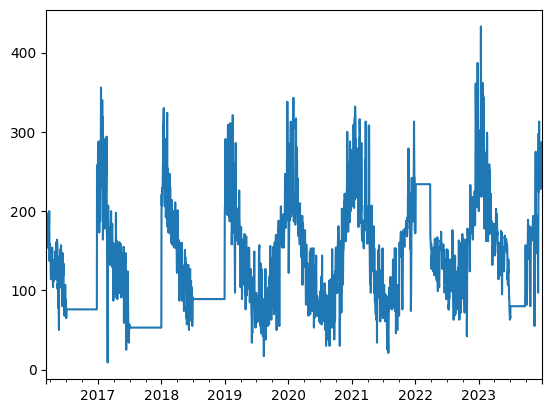

In [23]:
norm_aqi = new_data4['AQI']
norm_aqi.plot()

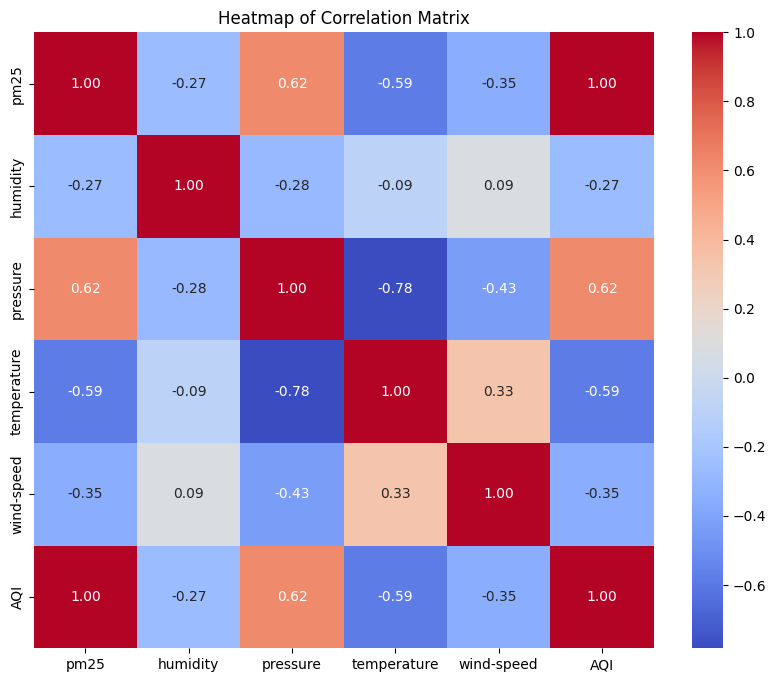

In [24]:
# Calculate the correlation matrix for numeric columns
corr = new_data4.corr(numeric_only=True)

# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Correlation Matrix")
#file_name = "correlation_matrix.png"
#path = "/kaggle/working/data-after-combine"
#plt.savefig(path,file_name)
plt.show()

# 2. Machine Learning (without scaling)

# 2.1. Splitting & Preprocessing the Raw Data(Normal AQI)

In [25]:
new_data4.columns

Index(['pm25', 'humidity', 'pressure', 'temperature', 'wind-speed', 'AQI'], dtype='object')

In [26]:
data = new_data4.copy()

In [27]:
data.head()

,pm25,humidity,pressure,temperature,wind-speed,AQI
2016-03-08,182.0,69.798784,1008.335627,26.751489,2.851745,182.0
2016-03-09,168.0,69.798784,1008.335627,26.751489,2.851745,168.0
2016-03-10,171.0,69.798784,1008.335627,26.751489,2.851745,171.0
2016-03-11,171.0,69.798784,1008.335627,26.751489,2.851745,171.0
2016-03-12,178.0,69.798784,1008.335627,26.751489,2.851745,178.0


In [28]:
num = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
cat = data.select_dtypes(include=['object'])

print(num.columns)
print(cat.columns)

Index(['pm25', 'humidity', 'pressure', 'temperature', 'wind-speed', 'AQI'], dtype='object')
Index([], dtype='object')


In [29]:
X = data[['pm25', 'humidity', 'pressure', 'temperature', 'wind-speed']]

y = data['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2284, 5) (2284,) (571, 5) (571,)


In [30]:
# Preprocessor without scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['pm25', 'humidity', 'pressure', 'temperature', 'wind-speed'])
    ])
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# 2.2. ML Model

In [31]:
def compare_and_save_models(X_train, X_test, y_train, y_test, preprocessor, metric='mse', save_dir='models'):
    
    
    # Initialize models
    models = {
        'knn': KNeighborsRegressor(n_neighbors=2),
        'random_forest': RandomForestRegressor(),
        'xgboost': XGBRegressor(objective='reg:squarederror'),
        'svr' : SVR(kernel='linear'),
        'neural_network': MLPRegressor(hidden_layer_sizes=(8,), activation='relu', 
                                     solver='adam', max_iter=2000, 
                                     learning_rate_init=0.0005)
    }
    
    # Dictionary to store results
    results = {}
    
    # Create save directory if it doesn't exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # Train and evaluate each model
    for name, model in models.items():
        # Create pipeline
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                                 ('regressor', model)])
        
        # Train model
        pipeline.fit(X_train, y_train)
        
        # Make predictions
        y_pred_train = pipeline.predict(X_train)
        y_pred_test = pipeline.predict(X_test)
        
        # Calculate metrics
        metrics = {
            'r2_train': r2_score(y_train, y_pred_train),
            'r2_test': r2_score(y_test, y_pred_test),
            'rmse_train': sqrt(mean_squared_error(y_train, y_pred_train)),
            'rmse_test': sqrt(mean_squared_error(y_test, y_pred_test)),
            'mae_train': mean_absolute_error(y_train, y_pred_train),
            'mae_test': mean_absolute_error(y_test, y_pred_test),
            'mse_train': mean_squared_error(y_train, y_pred_train),
            'mse_test': mean_squared_error(y_test, y_pred_test)
        }
        
        results[name] = {
            'pipeline': pipeline,
            'metrics': metrics
        }
    
    # Determine best model based on specified metric
    metric_map = {
        'r2': 'r2_test',
        'rmse': 'rmse_test',
        'mae': 'mae_test',
        'mse': 'mse_test'
    }
    
    comparison_metric = metric_map[metric]
    
    if metric == 'r2':  # Only R² should use max, all others should use min
        best_model = max(results.items(), 
                        key=lambda x: x[1]['metrics'][comparison_metric])
    else:  # For MSE, RMSE, MAE - lower is better
        best_model = min(results.items(), 
                        key=lambda x: x[1]['metrics'][comparison_metric])
    
    # Save the best model
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_path = os.path.join(save_dir, 
                             f'best_model_{best_model[0]}_{timestamp}.joblib')
    joblib.dump(best_model[1]['pipeline'], model_path)
    
    # Prepare return dictionary
    return_dict = {
        'best_model': best_model[0],
        'best_model_path': model_path,
        'model_performances': {name: results[name]['metrics'] 
                             for name in results.keys()}
    }
    
    return return_dict

In [32]:
# Get the results first
results = compare_and_save_models(
    X_train, X_test, y_train, y_test,
    preprocessor,
    metric='mse',
    save_dir='models'
)

In [33]:
# Print detailed results for all models
print("\nDetailed Model Performance Summary:")
print("-" * 50)

for model_name, performance in results['model_performances'].items():
    print(f"\n{model_name.upper()} Results:")
    print(f"R² score (train): {performance['r2_train']:.4f}")
    print(f"R² score (test): {performance['r2_test']:.4f}")
    print(f"RMSE (train): {performance['rmse_train']:.4f}")
    print(f"RMSE (test): {performance['rmse_test']:.4f}")
    print(f"MAE (train): {performance['mae_train']:.4f}")
    print(f"MAE (test): {performance['mae_test']:.4f}")
    print(f"MSE (train): {performance['mse_train']:.4f}")
    print(f"MSE (test): {performance['mse_test']:.4f}")

print("\n" + "=" * 50)
print(f"Best Model: {results['best_model']}")
print(f"Model saved at: {results['best_model_path']}")


Detailed Model Performance Summary:
--------------------------------------------------

KNN Results:
R² score (train): 0.9998
R² score (test): 0.9995
RMSE (train): 1.0176
RMSE (test): 1.5226
MAE (train): 0.3796
MAE (test): 0.6594
MSE (train): 1.0355
MSE (test): 2.3183

RANDOM_FOREST Results:
R² score (train): 0.9999
R² score (test): 0.9997
RMSE (train): 0.7188
RMSE (test): 1.1689
MAE (train): 0.0424
MAE (test): 0.1013
MSE (train): 0.5167
MSE (test): 1.3664

XGBOOST Results:
R² score (train): 1.0000
R² score (test): 0.9997
RMSE (train): 0.0500
RMSE (test): 1.1759
MAE (train): 0.0271
MAE (test): 0.1480
MSE (train): 0.0025
MSE (test): 1.3829

SVR Results:
R² score (train): 1.0000
R² score (test): 1.0000
RMSE (train): 0.0387
RMSE (test): 0.0397
MAE (train): 0.0320
MAE (test): 0.0336
MSE (train): 0.0015
MSE (test): 0.0016

NEURAL_NETWORK Results:
R² score (train): 1.0000
R² score (test): 1.0000
RMSE (train): 0.0608
RMSE (test): 0.0373
MAE (train): 0.0293
MAE (test): 0.0296
MSE (train): 0.0

# 3. Machine Learning (with scaling)

# 3.1. Splitting & Preprocessing the Raw Data(Normal AQI)

In [ ]:
new_data4.columns

In [ ]:
data = new_data4.copy()

In [ ]:
data.head()

In [ ]:
num = data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
cat = data.select_dtypes(include=['object'])

print(num.columns)
print(cat.columns)

In [ ]:
X = data[['pm25', 'humidity', 'pressure', 'temperature', 'wind-speed']]

y = data['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
# Preprocessor without scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[ 
            ('scaler', StandardScaler())
        ]), ['pm25', 'humidity', 'pressure', 'temperature', 'wind-speed'])  
    ])
    
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# 3.2. ML Model

In [ ]:
def compare_and_save_models(X_train, X_test, y_train, y_test, preprocessor, metric='mse', save_dir='models'):
    
    
    # Initialize models
    models = {
        'knn': KNeighborsRegressor(n_neighbors=2),
        'random_forest': RandomForestRegressor(),
        'xgboost': XGBRegressor(objective='reg:squarederror'),
        'svr' : SVR(kernel='linear'),
        'neural_network': MLPRegressor(hidden_layer_sizes=(8,), activation='relu', 
                                     solver='adam', max_iter=2000, 
                                     learning_rate_init=0.0005)
    }
    
    # Dictionary to store results
    results = {}
    
    # Create save directory if it doesn't exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # Train and evaluate each model
    for name, model in models.items():
        # Create pipeline
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                                 ('regressor', model)])
        
        # Train model
        pipeline.fit(X_train, y_train)
        
        # Make predictions
        y_pred_train = pipeline.predict(X_train)
        y_pred_test = pipeline.predict(X_test)
        
        # Calculate metrics
        metrics = {
            'r2_train': r2_score(y_train, y_pred_train),
            'r2_test': r2_score(y_test, y_pred_test),
            'rmse_train': sqrt(mean_squared_error(y_train, y_pred_train)),
            'rmse_test': sqrt(mean_squared_error(y_test, y_pred_test)),
            'mae_train': mean_absolute_error(y_train, y_pred_train),
            'mae_test': mean_absolute_error(y_test, y_pred_test),
            'mse_train': mean_squared_error(y_train, y_pred_train),
            'mse_test': mean_squared_error(y_test, y_pred_test)
        }
        
        results[name] = {
            'pipeline': pipeline,
            'metrics': metrics
        }
    
    # Determine best model based on specified metric
    metric_map = {
        'r2': 'r2_test',
        'rmse': 'rmse_test',
        'mae': 'mae_test',
        'mse': 'mse_test'
    }
    
    comparison_metric = metric_map[metric]
    
    if metric == 'r2':  # Only R² should use max, all others should use min
        best_model = max(results.items(), 
                        key=lambda x: x[1]['metrics'][comparison_metric])
    else:  # For MSE, RMSE, MAE - lower is better
        best_model = min(results.items(), 
                        key=lambda x: x[1]['metrics'][comparison_metric])
    
    # Save the best model
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_path = os.path.join(save_dir, 
                             f'best_model_{best_model[0]}_{timestamp}.joblib')
    joblib.dump(best_model[1]['pipeline'], model_path)
    
    # Prepare return dictionary
    return_dict = {
        'best_model': best_model[0],
        'best_model_path': model_path,
        'model_performances': {name: results[name]['metrics'] 
                             for name in results.keys()}
    }
    
    return return_dict

In [ ]:
# Get the results first
results = compare_and_save_models(
    X_train, X_test, y_train, y_test,
    preprocessor,
    metric='mse',
    save_dir='models'
)

In [ ]:
# Print detailed results for all models
print("\nDetailed Model Performance Summary:")
print("-" * 50)

for model_name, performance in results['model_performances'].items():
    print(f"\n{model_name.upper()} Results:")
    print(f"R² score (train): {performance['r2_train']:.4f}")
    print(f"R² score (test): {performance['r2_test']:.4f}")
    print(f"RMSE (train): {performance['rmse_train']:.4f}")
    print(f"RMSE (test): {performance['rmse_test']:.4f}")
    print(f"MAE (train): {performance['mae_train']:.4f}")
    print(f"MAE (test): {performance['mae_test']:.4f}")
    print(f"MSE (train): {performance['mse_train']:.4f}")
    print(f"MSE (test): {performance['mse_test']:.4f}")

print("\n" + "=" * 50)
print(f"Best Model: {results['best_model']}")
print(f"Model saved at: {results['best_model_path']}")

# 4 - Deep Learning Model(Without Scaling)

# 4.1. Splitting & Preprocessing the Raw Data(Normal AQI)

In [34]:
aqi_normal = new_data4.copy()

In [35]:
def new_data_to_X_y(new_data, window_size, train_pct, val_pct, test_pct):
    
    new_data_as_np = new_data.to_numpy()
    
    # Split features and target
    features = new_data_as_np[:, :-1]  # All columns except the last one
    target = new_data_as_np[:, -1]     # Only the AQI column
    
    # Split data based on percentages
    total_len = len(features)
    train_end = int(train_pct * total_len)
    val_end = train_end + int(val_pct * total_len)
    
    # Prepare train, val, and test splits for both features and target
    train_features = features[:train_end]
    train_target = target[:train_end]
    
    val_features = features[train_end:val_end]
    val_target = target[train_end:val_end]
    
    test_features = features[val_end:]
    test_target = target[val_end:]
    
    # Helper function to create X and y
    def create_X_y(feature_data, target_data):
        X, y = [], []
        for i in range(len(feature_data) - window_size):
            # Create sequence of all features
            sequence = feature_data[i:i + window_size]
            X.append(sequence)
            # Get the target AQI value
            y.append(target_data[i + window_size])
        return np.array(X), np.array(y)
    
    
    X_train, y_train = create_X_y(train_features, train_target)
    X_val, y_val = create_X_y(val_features, val_target)
    X_test, y_test = create_X_y(test_features, test_target)
    
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

In [36]:
WINDOW_SIZE = 6
NUM_FEATURES = 5
train_pct = 0.8
val_pct = 0.1
test_pct = 0.1

(X_train1, y_train1), (X_val1, y_val1), (X_test1, y_test1) = new_data_to_X_y(
    aqi_normal, WINDOW_SIZE, train_pct, val_pct, test_pct
)

In [37]:
# shapes
print("Train shapes:", X_train1.shape, y_train1.shape)
print("Validation shapes:", X_val1.shape, y_val1.shape)
print("Test shapes:", X_test1.shape, y_test1.shape)

Train shapes: (2278, 6, 5) (2278,)
Validation shapes: (279, 6, 5) (279,)
Test shapes: (280, 6, 5) (280,)


#  4.2. DL Model

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

Bi-LSTM

In [39]:
lstm_model = Sequential()
lstm_model.add(InputLayer(shape=(WINDOW_SIZE, NUM_FEATURES)))
lstm_model.add(BatchNormalization())
lstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
lstm_model.add(Dropout(0.3))
lstm_model.add(Bidirectional(LSTM(32)))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(BatchNormalization())
lstm_model.add(Dense(16, activation='relu'))
lstm_model.add(Dense(1, activation='linear'))

lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 6, 5)                │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 6, 128)              │          35,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,829 (311.83 KB)

 Trainable params: 79,755 (311.54 KB)

 Non-trainable params: 74 (296.00 B)

In [40]:
cp1 = ModelCheckpoint('/kaggle/working/lstm_model1.keras', save_best_only=True)

lstm_model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[MeanAbsoluteError()])

In [41]:
lstm_model.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp1])

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 21534.5273 - mean_absolute_error: 131.8954 - val_loss: 33174.0156 - val_mean_absolute_error: 168.1911
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 20338.4043 - mean_absolute_error: 128.9094 - val_loss: 31191.6348 - val_mean_absolute_error: 162.1933
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 18979.4961 - mean_absolute_error: 124.6591 - val_loss: 27892.6836 - val_mean_absolute_error: 152.2308
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 16995.2715 - mean_absolute_error: 118.7973 - val_loss: 20693.4355 - val_mean_absolute_error: 128.9382
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 14641.4199 - mean_absolute_error: 111.3564 - val_loss: 14979.0781 - val_mean_absolute_error: 107.7422
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 11382.7266 - mean_absolute_error: 98.3392 - val_loss: 11993.3828 - val_mean_absolute_error: 98.0704
Epoch 7/100
72/72 ━━━━━━━━━━━━

In [42]:
from tensorflow.keras.models import load_model
model1 = load_model('/kaggle/working/lstm_model1.keras')

In [43]:
# Evaluate the model on the train data
train_result = model1.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 15.9757
Mean Squared Error (MSE): 561.8133
Root Mean Squared Error (RMSE): 23.7026
R-squared (Accuracy): 0.8710


In [44]:
# Evaluate the model on the validation data
val_result = model1.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 22.1959
Mean Squared Error (MSE): 959.5505
Root Mean Squared Error (RMSE): 30.9766
R-squared (Accuracy): 0.8140


In [45]:
# Evaluate the model on the test data
test_result = model1.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 16.0688
Mean Squared Error (MSE): 417.7447
Root Mean Squared Error (RMSE): 20.4388
R-squared (Accuracy): 0.8629


In [46]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Train Predictions,Actuals
0,170.056534,182.0
1,178.741074,185.0
2,183.345963,197.0
3,195.346542,177.0
4,181.353928,194.0
...,...,...
2273,142.406067,127.0
2274,138.500549,144.0
2275,137.836319,147.0
2276,138.856552,153.0


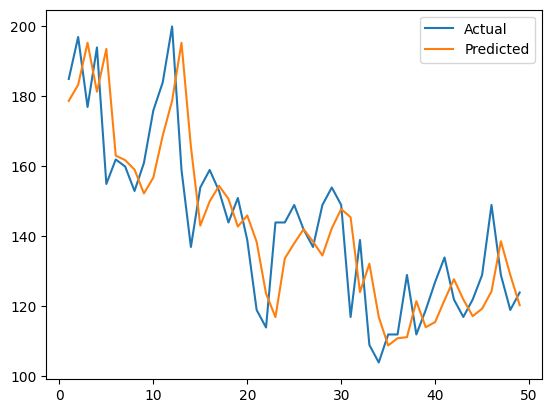

In [47]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [48]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,140.810760,122.0
1,118.785301,137.0
2,130.902542,109.0
3,124.700859,97.0
4,96.112320,122.0
...,...,...
274,164.943069,187.0
275,172.470993,180.0
276,157.569092,167.0
277,165.810028,157.0


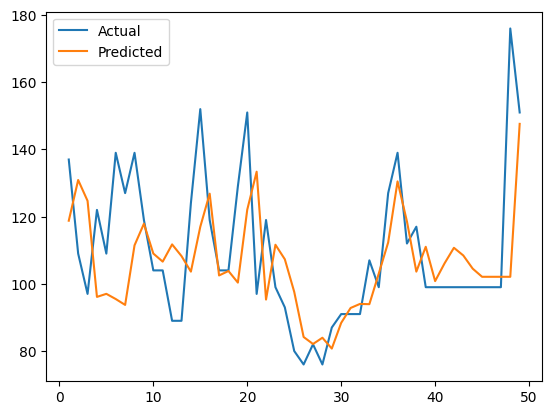

In [49]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [50]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,151.557388,159.0
1,163.091721,184.0
2,182.975418,159.0
3,153.787949,164.0
4,161.171249,151.0
...,...,...
275,242.767853,287.0
276,265.178802,249.0
277,253.975998,272.0
278,255.859055,234.0


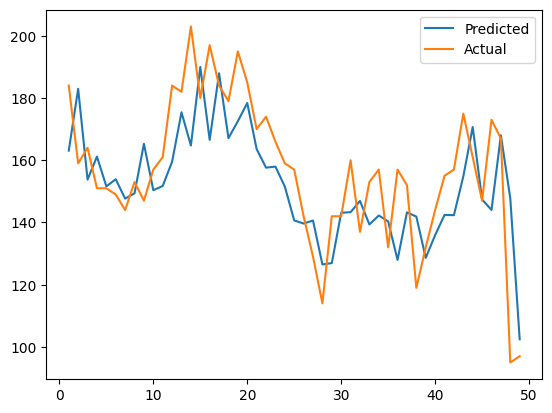

In [51]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

GRU

In [52]:
gru_model = Sequential()
gru_model.add(InputLayer(shape=(WINDOW_SIZE, NUM_FEATURES)))
gru_model.add(BatchNormalization())
gru_model.add(Bidirectional(GRU(64, return_sequences=True)))
gru_model.add(Dropout(0.3))
gru_model.add(Bidirectional(GRU(32)))
gru_model.add(Dropout(0.3))
gru_model.add(Dense(32, activation='relu'))
gru_model.add(BatchNormalization())
gru_model.add(Dense(16, activation='relu'))
gru_model.add(Dense(1, activation='linear'))

gru_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_2                │ (None, 6, 5)                │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 6, 128)              │          27,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 64)                  │          31,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,141 (238.83 KB)

 Trainable params: 61,067 (238.54 KB)

 Non-trainable params: 74 (296.00 B)

In [53]:
cp2 = ModelCheckpoint('/kaggle/working/gru_model1.keras', save_best_only=True)

gru_model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[MeanAbsoluteError()])

In [55]:
gru_model.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp2])

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 904.8796 - mean_absolute_error: 22.4487 - val_loss: 1033.9364 - val_mean_absolute_error: 22.1777
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 847.3892 - mean_absolute_error: 21.6710 - val_loss: 1043.0242 - val_mean_absolute_error: 22.3023
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 887.8079 - mean_absolute_error: 22.1331 - val_loss: 1025.1365 - val_mean_absolute_error: 22.2073
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 865.6751 - mean_absolute_error: 21.7675 - val_loss: 1048.5956 - val_mean_absolute_error: 22.4213
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 892.4713 - mean_absolute_error: 22.0340 - val_loss: 1014.5551 - val_mean_absolute_error: 22.3328
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 840.9745 - mean_absolute_error: 20.9215 - val_loss: 1028.7587 - val_mean_absolute_error: 22.2793
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 918.

In [56]:
from tensorflow.keras.models import load_model
model2 = load_model('/kaggle/working/gru_model1.keras')

In [57]:
# Evaluate the model on the train data
train_result = model2.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 15.6024
Mean Squared Error (MSE): 573.9265
Root Mean Squared Error (RMSE): 23.9568
R-squared (Accuracy): 0.8682


In [58]:
# Evaluate the model on the validation data
val_result = model2.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 21.6980
Mean Squared Error (MSE): 960.0462
Root Mean Squared Error (RMSE): 30.9846
R-squared (Accuracy): 0.8139


In [59]:
# Evaluate the model on the test data
test_result = model2.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 12.9870
Mean Squared Error (MSE): 364.9268
Root Mean Squared Error (RMSE): 19.1031
R-squared (Accuracy): 0.8803


In [60]:
train_predictions = model2.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Train Predictions,Actuals
0,173.113861,182.0
1,182.258682,185.0
2,186.351746,197.0
3,197.366791,177.0
4,182.291412,194.0
...,...,...
2273,130.943756,127.0
2274,126.179153,144.0
2275,131.749680,147.0
2276,135.157196,153.0


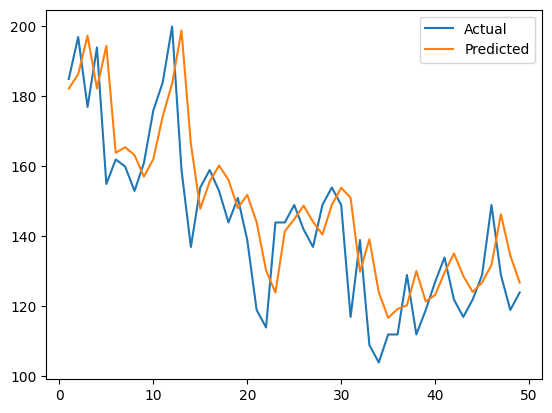

In [61]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [62]:
val_predictions = model2.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,143.322937,122.0
1,125.876755,137.0
2,131.129471,109.0
3,118.085655,97.0
4,106.569145,122.0
...,...,...
274,168.258835,187.0
275,174.049011,180.0
276,163.895538,167.0
277,173.022873,157.0


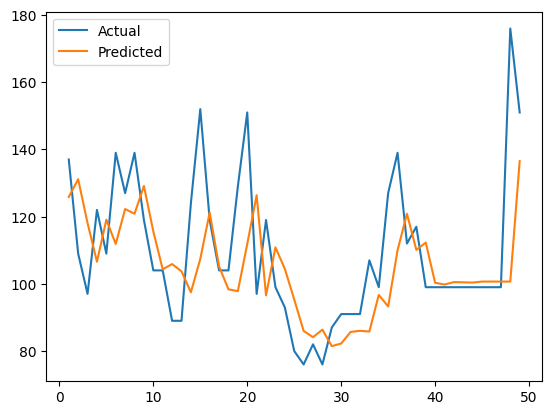

In [63]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [65]:
test_predictions = model2.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Train Predictions,Actuals
0,154.082062,159.0
1,163.409363,184.0
2,189.171585,159.0
3,150.748596,164.0
4,167.003906,151.0
...,...,...
275,247.373611,287.0
276,260.058136,249.0
277,252.713379,272.0
278,251.487213,234.0


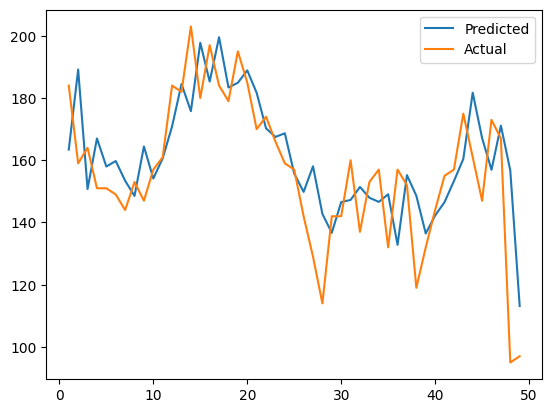

In [66]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

RNN

In [67]:
rnn_model = Sequential()
rnn_model.add(InputLayer(shape=(WINDOW_SIZE, NUM_FEATURES)))
rnn_model.add(BatchNormalization())
rnn_model.add(Bidirectional(SimpleRNN(64, return_sequences=True)))
rnn_model.add(Dropout(0.3))
rnn_model.add(Bidirectional(SimpleRNN(32)))
rnn_model.add(Dropout(0.3))
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(BatchNormalization())
rnn_model.add(Dense(16, activation='relu'))
rnn_model.add(Dense(1, activation='linear'))

rnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_4                │ (None, 6, 5)                │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 6, 128)              │           8,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 64)                  │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,037 (86.08 KB)

 Trainable params: 21,963 (85.79 KB)

 Non-trainable params: 74 (296.00 B)

In [68]:
cp3 = ModelCheckpoint('/kaggle/working/rnn_model1.keras', save_best_only=True)

rnn_model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[MeanAbsoluteError()])

In [69]:
rnn_model.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp3])

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - loss: 21436.8730 - mean_absolute_error: 131.8880 - val_loss: 32447.6523 - val_mean_absolute_error: 165.9783
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19610.3125 - mean_absolute_error: 127.0178 - val_loss: 30198.9609 - val_mean_absolute_error: 159.1192
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17847.0000 - mean_absolute_error: 121.3353 - val_loss: 26053.7168 - val_mean_absolute_error: 146.4682
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15087.6748 - mean_absolute_error: 112.1610 - val_loss: 22269.2910 - val_mean_absolute_error: 135.7864
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13171.2324 - mean_absolute_error: 105.8360 - val_loss: 13103.5928 - val_mean_absolute_error: 101.9523
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10807.0293 - mean_absolute_error: 96.3628 - val_loss: 10937.3096 - val_mean_absolute_error: 95.0013
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━

In [70]:
from tensorflow.keras.models import load_model
model3 = load_model('/kaggle/working/rnn_model1.keras')

In [71]:
# Evaluate the model on the train data
train_result = model3.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 14.8931
Mean Squared Error (MSE): 494.5044
Root Mean Squared Error (RMSE): 22.2375
R-squared (Accuracy): 0.8865


In [72]:
# Evaluate the model on the validation data
val_result = model3.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 22.2230
Mean Squared Error (MSE): 991.9863
Root Mean Squared Error (RMSE): 31.4958
R-squared (Accuracy): 0.8077


In [73]:
# Evaluate the model on the test data
test_result = model3.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 15.0930
Mean Squared Error (MSE): 403.0842
Root Mean Squared Error (RMSE): 20.0770
R-squared (Accuracy): 0.8677


In [74]:
train_predictions = model3.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Train Predictions,Actuals
0,170.248276,182.0
1,176.718292,185.0
2,181.737106,197.0
3,198.982849,177.0
4,181.601059,194.0
...,...,...
2273,134.522736,127.0
2274,136.705521,144.0
2275,128.330002,147.0
2276,145.227219,153.0


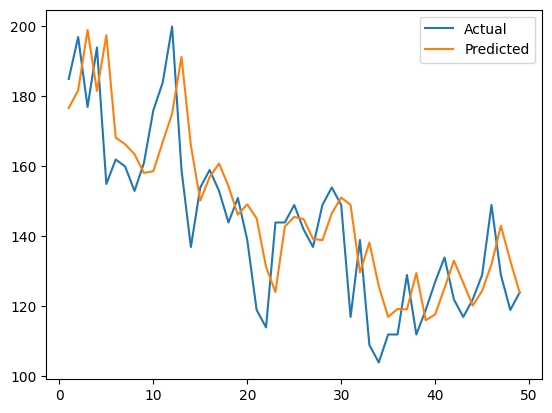

In [75]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [76]:
val_predictions = model3.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,150.873001,122.0
1,124.916161,137.0
2,133.206223,109.0
3,129.827377,97.0
4,120.172096,122.0
...,...,...
274,162.765762,187.0
275,180.010376,180.0
276,161.473236,167.0
277,172.214981,157.0


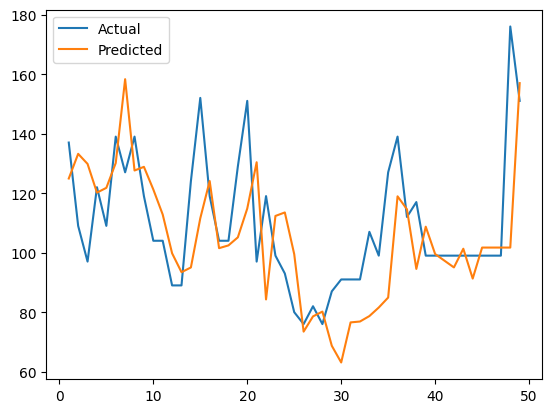

In [77]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [78]:
test_predictions = model3.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,147.316895,159.0
1,159.499496,184.0
2,182.234344,159.0
3,147.617386,164.0
4,169.221359,151.0
...,...,...
275,248.761963,287.0
276,259.055115,249.0
277,259.145355,272.0
278,246.054947,234.0


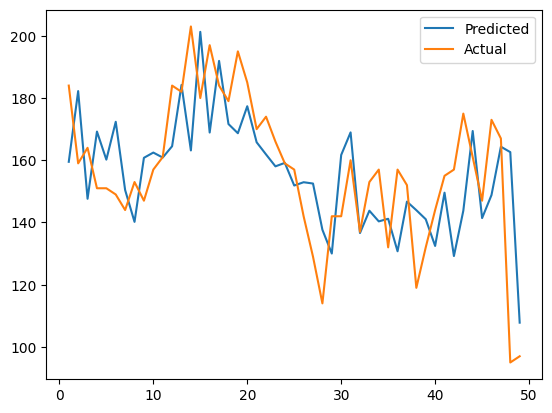

In [79]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

CNN-GRU(Bi)

In [80]:
cnn_gru_model = Sequential()
cnn_gru_model.add(InputLayer(shape=(WINDOW_SIZE, NUM_FEATURES)))
cnn_gru_model.add(BatchNormalization())
cnn_gru_model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn_gru_model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn_gru_model.add(Dropout(0.3))
cnn_gru_model.add(Bidirectional(GRU(32, return_sequences=True)))
cnn_gru_model.add(Dropout(0.3))
cnn_gru_model.add(Bidirectional(GRU(16)))
cnn_gru_model.add(Dense(32, activation='relu'))
cnn_gru_model.add(BatchNormalization())
cnn_gru_model.add(Dense(16, activation='relu'))
cnn_gru_model.add(Dense(1, activation='linear'))

cnn_gru_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_6                │ (None, 6, 5)                │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 6, 128)              │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 6, 64)               │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 6, 64)               │          18,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 32)                  │           7,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,125 (215.33 KB)

 Trainable params: 55,051 (215.04 KB)

 Non-trainable params: 74 (296.00 B)

In [81]:
cp4 = ModelCheckpoint('/kaggle/working/cnn_gru_model1.keras', save_best_only=True)

cnn_gru_model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[MeanAbsoluteError()])

In [82]:
cnn_gru_model.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp4])

Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 21848.2383 - mean_absolute_error: 132.3724 - val_loss: 31508.0508 - val_mean_absolute_error: 163.0972
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 19102.7930 - mean_absolute_error: 124.6630 - val_loss: 25195.0723 - val_mean_absolute_error: 142.1810
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 16346.2949 - mean_absolute_error: 116.3160 - val_loss: 16836.5605 - val_mean_absolute_error: 109.0467
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 14391.7041 - mean_absolute_error: 109.7041 - val_loss: 11280.0449 - val_mean_absolute_error: 82.3506
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 10969.0498 - mean_absolute_error: 95.4171 - val_loss: 7171.3940 - val_mean_absolute_error: 63.2799
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8322.9639 - mean_absolute_error: 83.3940 - val_loss: 4399.6533 - val_mean_absolute_error: 48.6409
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━

In [83]:
from tensorflow.keras.models import load_model
model4 = load_model('/kaggle/working/cnn_gru_model1.keras')

In [84]:
# Evaluate the model on the train data
train_result = model4.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 17.6673
Mean Squared Error (MSE): 604.8530
Root Mean Squared Error (RMSE): 24.5938
R-squared (Accuracy): 0.8611


In [85]:
# Evaluate the model on the validation data
val_result = model4.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Evaluation Metrics:
Mean Absolute Error (MAE): 21.9549
Mean Squared Error (MSE): 958.3959
Root Mean Squared Error (RMSE): 30.9580
R-squared (Accuracy): 0.8142


In [86]:
# Evaluate the model on the test data
test_result = model4.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Evaluation Metrics:
Mean Absolute Error (MAE): 14.6576
Mean Squared Error (MSE): 403.0424
Root Mean Squared Error (RMSE): 20.0759
R-squared (Accuracy): 0.8678


In [87]:
train_predictions = model4.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Train Predictions,Actuals
0,173.436630,182.0
1,182.690460,185.0
2,188.636734,197.0
3,200.536743,177.0
4,186.322220,194.0
...,...,...
2273,129.169128,127.0
2274,130.146179,144.0
2275,131.967590,147.0
2276,145.976196,153.0


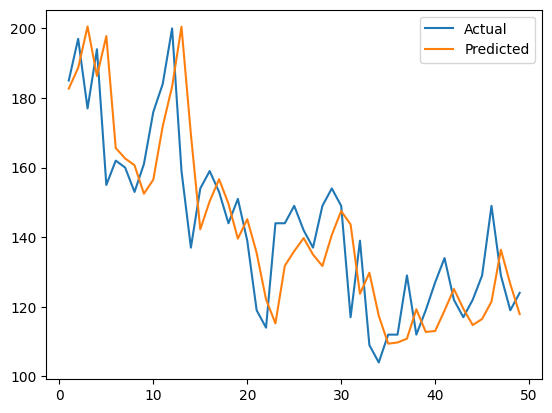

In [88]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [89]:
val_predictions = model4.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,156.427994,122.0
1,126.561874,137.0
2,138.032639,109.0
3,130.960373,97.0
4,120.275887,122.0
...,...,...
274,163.131744,187.0
275,173.359039,180.0
276,165.393387,167.0
277,174.557587,157.0


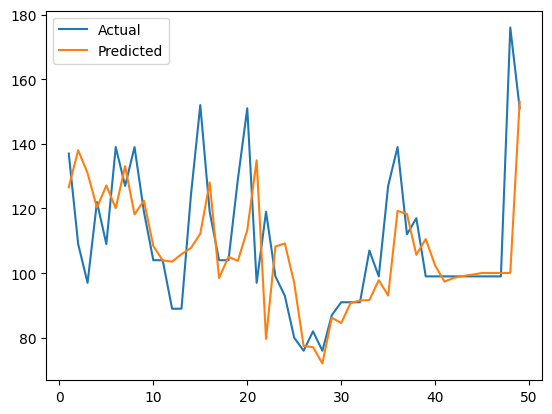

In [90]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [91]:
test_predictions = model4.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,Train Predictions,Actuals
0,148.021851,159.0
1,152.394730,184.0
2,177.871979,159.0
3,146.784637,164.0
4,159.841309,151.0
...,...,...
275,258.937714,287.0
276,265.322144,249.0
277,255.845581,272.0
278,256.063873,234.0


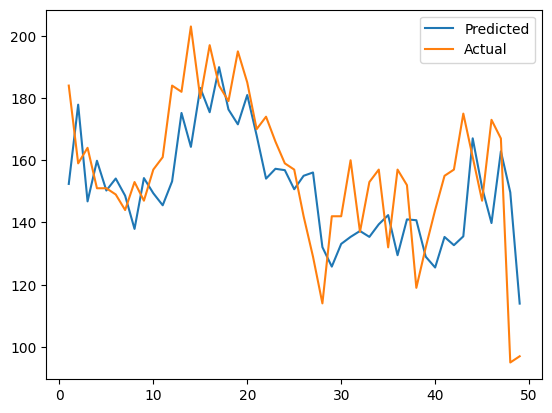

In [92]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

# 5 - Deep Learning Model(With Scaling)

# 5.1. Splitting & Preprocessing the Raw Data(Normal AQI)

In [ ]:
aqi_normal = new_data4.copy()

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(aqi_normal)

In [ ]:
def new_data_to_X_y(new_data, window_size, train_pct, val_pct, test_pct):
    
    new_data_as_np = new_data
    
    # Split features and target
    features = new_data_as_np[:, :-1]  # All columns except the last one
    target = new_data_as_np[:, -1]     # Only the AQI column
    
    # Split data based on percentages
    total_len = len(features)
    train_end = int(train_pct * total_len)
    val_end = train_end + int(val_pct * total_len)
    
    # Prepare train, val, and test splits for both features and target
    train_features = features[:train_end]
    train_target = target[:train_end]
    
    val_features = features[train_end:val_end]
    val_target = target[train_end:val_end]
    
    test_features = features[val_end:]
    test_target = target[val_end:]
    
    # Helper function to create X and y
    def create_X_y(feature_data, target_data):
        X, y = [], []
        for i in range(len(feature_data) - window_size):
            # Create sequence of all features
            sequence = feature_data[i:i + window_size]
            X.append(sequence)
            # Get the target AQI value
            y.append(target_data[i + window_size])
        return np.array(X), np.array(y)
    
    
    X_train, y_train = create_X_y(train_features, train_target)
    X_val, y_val = create_X_y(val_features, val_target)
    X_test, y_test = create_X_y(test_features, test_target)
    
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

In [ ]:
WINDOW_SIZE = 6
NUM_FEATURES = 5
train_pct = 0.8
val_pct = 0.1
test_pct = 0.1

(X_train1, y_train1), (X_val1, y_val1), (X_test1, y_test1) = new_data_to_X_y(
    scaled_data, WINDOW_SIZE, train_pct, val_pct, test_pct
)

In [ ]:
# shapes
print("Train shapes:", X_train1.shape, y_train1.shape)
print("Validation shapes:", X_val1.shape, y_val1.shape)
print("Test shapes:", X_test1.shape, y_test1.shape)

#  5.2. DL Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

Bi-LSTM

In [ ]:
lstm_model_v = Sequential()
lstm_model_v.add(InputLayer(shape=(WINDOW_SIZE, NUM_FEATURES)))
lstm_model_v.add(BatchNormalization())
lstm_model_v.add(Bidirectional(LSTM(64, return_sequences=True)))
lstm_model_v.add(Dropout(0.3))
lstm_model_v.add(Bidirectional(LSTM(32)))
lstm_model_v.add(Dropout(0.3))
lstm_model_v.add(Dense(32, activation='relu'))
lstm_model_v.add(BatchNormalization())
lstm_model_v.add(Dense(16, activation='relu'))
lstm_model_v.add(Dense(1, activation='linear'))

lstm_model_v.summary()

In [ ]:
cp5 = ModelCheckpoint('/kaggle/working/lstm_model_v1.keras', save_best_only=True)

lstm_model_v.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[MeanAbsoluteError()])

In [ ]:
lstm_model_v.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp5])

In [ ]:
from tensorflow.keras.models import load_model
model5 = load_model('/kaggle/working/lstm_model_v1.keras')

In [ ]:
# Evaluate the model on the train data
train_result = model5.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

In [ ]:
# Evaluate the model on the validation data
val_result = model5.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

In [ ]:
# Evaluate the model on the test data
test_result = model5.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

In [ ]:
train_predictions = model5.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

In [ ]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [ ]:
val_predictions = model5.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

In [ ]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [ ]:
test_predictions = model5.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

In [ ]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

GRU

In [ ]:
gru_model_v = Sequential()
gru_model_v.add(InputLayer(shape=(WINDOW_SIZE, NUM_FEATURES)))
gru_model_v.add(BatchNormalization())
gru_model_v.add(Bidirectional(GRU(64, return_sequences=True)))
gru_model_v.add(Dropout(0.3))
gru_model_v.add(Bidirectional(GRU(32)))
gru_model_v.add(Dropout(0.3))
gru_model_v.add(Dense(32, activation='relu'))
gru_model_v.add(BatchNormalization())
gru_model_v.add(Dense(16, activation='relu'))
gru_model_v.add(Dense(1, activation='linear'))

gru_model_v.summary()

In [ ]:
cp6 = ModelCheckpoint('/kaggle/working/gru_model_v1.keras', save_best_only=True)

gru_model_v.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[MeanAbsoluteError()])

In [ ]:
gru_model_v.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp6])

In [ ]:
from tensorflow.keras.models import load_model
model6 = load_model('/kaggle/working/gru_model_v1.keras')

In [ ]:
# Evaluate the model on the train data
train_result = model6.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

In [ ]:
# Evaluate the model on the validation data
val_result = model6.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

In [ ]:
# Evaluate the model on the test data
test_result = model6.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

In [ ]:
train_predictions = model6.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

In [ ]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [ ]:
val_predictions = model6.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

In [ ]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [ ]:
test_predictions = model6.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

In [ ]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

RNN

In [ ]:
rnn_model_v = Sequential()
rnn_model_v.add(InputLayer(shape=(WINDOW_SIZE, NUM_FEATURES)))
rnn_model_v.add(BatchNormalization())
rnn_model_v.add(Bidirectional(SimpleRNN(64, return_sequences=True)))
rnn_model_v.add(Dropout(0.3))
rnn_model_v.add(Bidirectional(SimpleRNN(32)))
rnn_model_v.add(Dropout(0.3))
rnn_model_v.add(Dense(32, activation='relu'))
rnn_model_v.add(BatchNormalization())
rnn_model_v.add(Dense(16, activation='relu'))
rnn_model_v.add(Dense(1, activation='linear'))

rnn_model_v.summary()

In [ ]:
cp7 = ModelCheckpoint('/kaggle/working/rnn_model_v1.keras', save_best_only=True)

rnn_model_v.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[MeanAbsoluteError()])

In [ ]:
rnn_model_v.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp7])

In [ ]:
from tensorflow.keras.models import load_model
model7 = load_model('/kaggle/working/rnn_model_v1.keras')

In [ ]:
# Evaluate the model on the train data
train_result = model7.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

In [ ]:
# Evaluate the model on the validation data
val_result = model7.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

In [ ]:
# Evaluate the model on the test data
test_result = model7.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

In [ ]:
train_predictions = model7.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

In [ ]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [ ]:
val_predictions = model7.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

In [ ]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [ ]:
test_predictions = model7.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

In [ ]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

CNN-GRU(Bi)

In [ ]:
cnn_gru_model_v = Sequential()
cnn_gru_model_v.add(InputLayer(shape=(WINDOW_SIZE, NUM_FEATURES)))
cnn_gru_model_v.add(BatchNormalization())
cnn_gru_model_v.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn_gru_model_v.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn_gru_model_v.add(Dropout(0.3))
cnn_gru_model_v.add(Bidirectional(GRU(32, return_sequences=True)))
cnn_gru_model_v.add(Dropout(0.3))
cnn_gru_model_v.add(Bidirectional(GRU(16)))
cnn_gru_model_v.add(Dense(32, activation='relu'))
cnn_gru_model_v.add(BatchNormalization())
cnn_gru_model_v.add(Dense(16, activation='relu'))
cnn_gru_model_v.add(Dense(1, activation='linear'))

cnn_gru_model_v.summary()

In [ ]:
cp8 = ModelCheckpoint('/kaggle/working/cnn_gru_model_v1.keras', save_best_only=True)

cnn_gru_model_v.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), 
               metrics=[MeanAbsoluteError()])

In [ ]:
cnn_gru_model_v.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, 
           callbacks=[cp8])

In [ ]:
from tensorflow.keras.models import load_model
model8 = load_model('/kaggle/working/cnn_gru_model_v1.keras')

In [ ]:
# Evaluate the model on the train data
train_result = model8.predict(X_train1)

# Calculate metrics
mse = mean_squared_error(y_train1, train_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train1, train_result)
r2 = r2_score(y_train1, train_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

In [ ]:
# Evaluate the model on the validation data
val_result = model8.predict(X_val1)

# Calculate metrics
mse = mean_squared_error(y_val1, val_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val1, val_result)
r2 = r2_score(y_val1, val_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

In [ ]:
# Evaluate the model on the test data
test_result = model8.predict(X_test1)

# Calculate metrics
mse = mean_squared_error(y_test1, test_result)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test1, test_result)
r2 = r2_score(y_test1, test_result)

# Print the results
print("Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (Accuracy): {r2:.4f}")

In [ ]:
train_predictions = model8.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

In [ ]:
plt.plot(train_results['Actuals'][1:50], label='Actual')
plt.plot(train_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [ ]:
val_predictions = model8.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Train Predictions':val_predictions, 'Actuals':y_val1})
val_results

In [ ]:
plt.plot(val_results['Actuals'][1:50], label='Actual')
plt.plot(val_results['Train Predictions'][1:50], label='Predicted')
plt.legend()
plt.show()

In [ ]:
test_predictions = model8.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

In [ ]:
plt.plot(test_results['Train Predictions'][1:50], label='Predicted')
plt.plot(test_results['Actuals'][1:50], label='Actual')
plt.legend()
plt.show()

# Best model neural network without scaling

In [95]:
from joblib import load  

# Load the model
model = load('/kaggle/working/models/best_model_neural_network_20250122_212312.joblib')

# Predict using the model
predictions = model.predict(data)

# Add predictions to the original dataframe
data['predictions'] = predictions 

os.makedirs('/kaggle/working', exist_ok=True)

# Save to CSV
data.to_csv('/kaggle/working/bangladesh_dhaka_predictions.csv')